In [1]:
using Plots
using LinearAlgebra
using Distributions

En la siguiente celda podemos ver la distribución de Laplace con $\mu = 0$ y $\theta = 1$ 

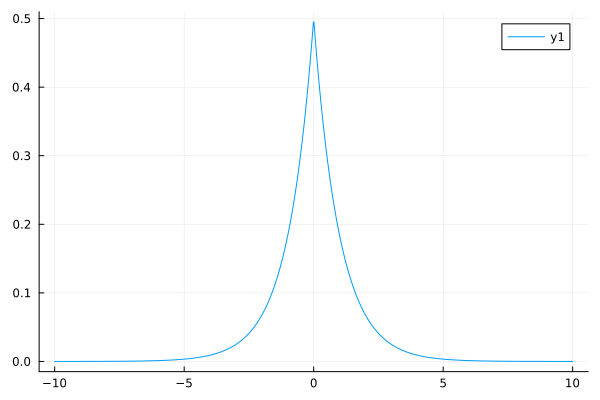

In [3]:
X = LinRange(-10,10,1000)
plot(X,[pdf(Laplace(),i) for i in X])

Primero establezcamos nuestra función signo

In [4]:
function sgn(x)
    if x < 0
        return -1
    elseif x > 0
        return 1
    else
        return 0
    end 
end

sgn (generic function with 1 method)

Establezcamos ahora nuestra transformada inversa

In [5]:
function Laplace_sim(mu,b,U)
    return mu - b.*sgn(U).*log(1-2 .* abs(U))
end

Laplace_sim (generic function with 1 method)

Pasemos a realizar nuestras simulaciones

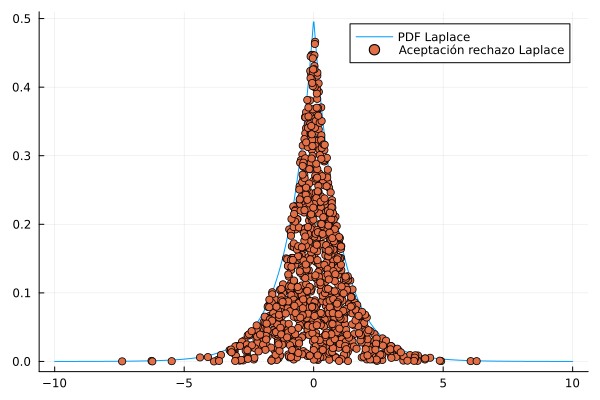

In [51]:
n = 1000
X = LinRange(-10,10,n)
plot(X,[pdf(Laplace(),i) for i in X], label = "PDF Laplace") #Establecemos esta parte del codigo para comparar con las simulaciones

U = rand(Float64,n) .- 0.5
MU = [0 for i in 1:n]
B = [1 for i in 1:n]
V = Laplace_sim.(MU,B,U)

V2 = [rand(Float64) .* pdf(Laplace(),i) for i in V]

scatter!(V,V2, label = "Aceptación rechazo Laplace")

Veamos ahora el histograma de nuestro resultado

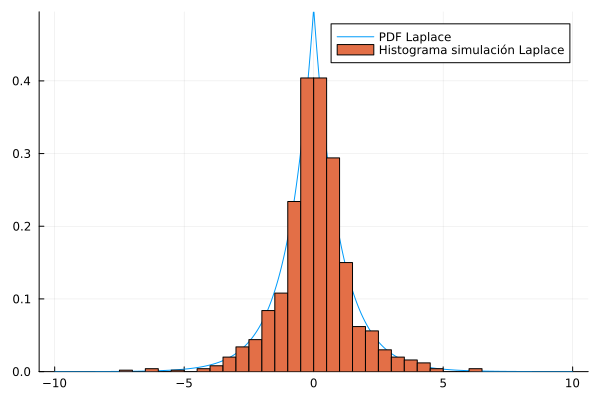

In [52]:
plot(X,[pdf(Laplace(),i) for i in X], label = "PDF Laplace")
histogram!(V,label = "Histograma simulación Laplace", normalize =:pdf)

Si lo refinamos aun mas, es evidente

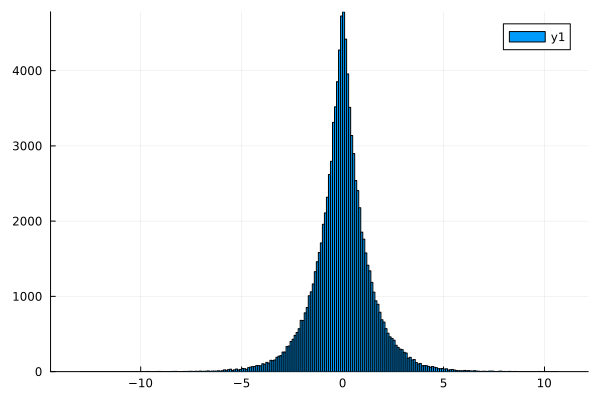

In [53]:
U = rand(Float64,100000) .- 0.5
MU = [0 for i in 1:100000]
B = [1 for i in 1:100000]
V = Laplace_sim.(MU,B,U)

histogram(V)

Visualizemos primero nuestra distribución de pareto

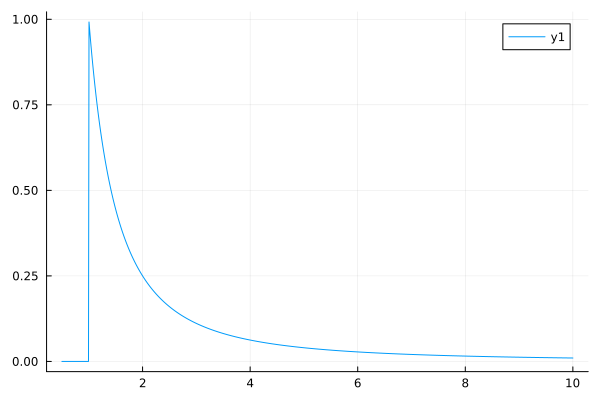

In [54]:
X = LinRange(0.5,10,1000)
Y = pdf.(Pareto(),X)
plot(X,Y)

Definamos ahora nuestra trnaformación inversa

In [55]:
function Pareto_sim(x_0,alpha,U)
    return x_0 .* (1 ./ (U .^ (1/alpha)))
end

Pareto_sim (generic function with 1 method)

Pasemos a simular nuestra función

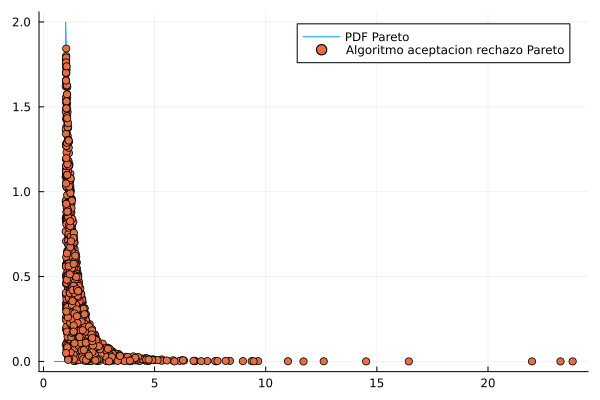

In [56]:
n = 1000
X = LinRange(0.5,2,1000)
Y = pdf.(Pareto(2,1),X)
plot(X,Y, label = "PDF Pareto")

U = rand(Float64,n)
x_0 = [1 for i in 1:n]
alpha = [2 for i in 1:n] 

V = Pareto_sim.(x_0,alpha,U)

V2 = [rand(Float64) .* pdf(Pareto(2,1),i) for i in V]

scatter!(V,V2, label = "Algoritmo aceptacion rechazo Pareto")

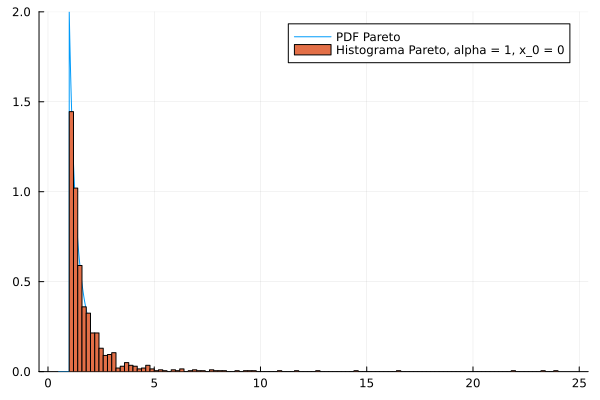

In [57]:
plot(X,Y, label = "PDF Pareto")
X1 = Pareto_sim.(x_0,alpha,U)
histogram!(X1, label = "Histograma Pareto, alpha = 1, x_0 = 0",normalize =:pdf)

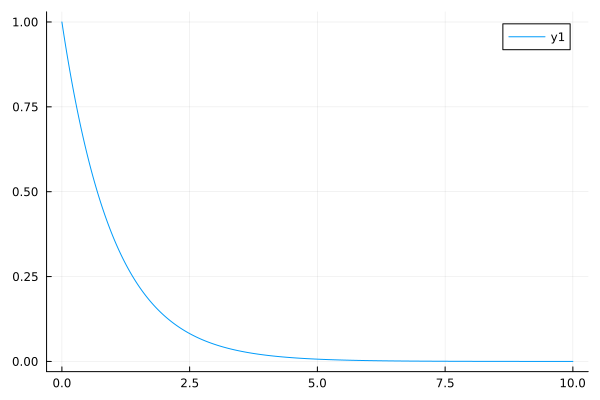

In [58]:
X = LinRange(0,10,1000)
Y = pdf.(Weibull(),X)
plot(X,Y)

Definamos nuestra función de la transformación inversa

In [59]:
function Weibull_sim(alpha, lambda, U)
    ((-log(U)).^(1/alpha)) ./ (lambda)
end

Weibull_sim (generic function with 1 method)

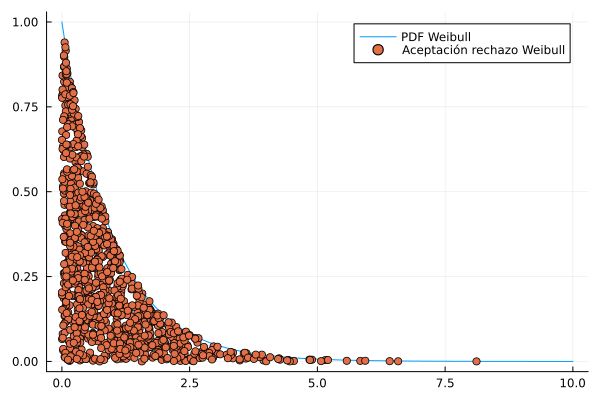

In [60]:
X = LinRange(0,10,1000)
Y = pdf.(Weibull(),X)
plot(X,Y,label = "PDF Weibull")

alpha = [1 for i in 1:1000]
lambda = [1 for i in 1:1000]
U = rand(Float64,1000)

V = Weibull_sim.(alpha,lambda,U)
V2 = [rand(Float64) .* pdf(Weibull(),i) for i in V]

scatter!(V,V2, label = "Aceptación rechazo Weibull")

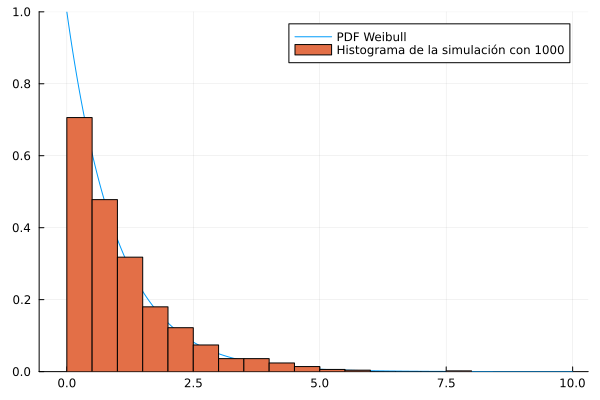

In [62]:
alpha = [1 for i in 1:1000]
lambda = [1 for i in 1:1000]
U = rand(Float64,1000)

V = Weibull_sim.(alpha,lambda,U)
plot(X,Y,label = "PDF Weibull")
histogram!(V, label = "Histograma de la simulación con 1000", normalize=:pdf)

## Inciso 4

Veamos como se ve nuestra función de densidad con la proba bien definida

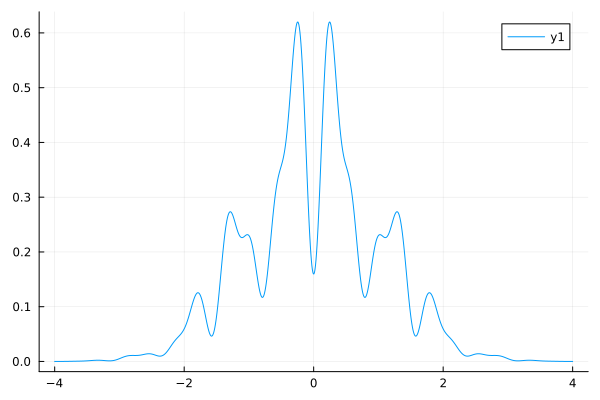

In [63]:
X = LinRange(-4,4,1000)
G(x) = exp.((.- x .^2) ./ 2) * (0.5 .* sin(8 .* x) .^ 2 .+ 2 .* cos(2 .* x) .^ 2 .* sin(4 .* x) .^ 2 .+ 0.5 ) .* 0.319132
plot(X,G.(X))

Simulemos en este caso $Y \sim Uniforme(a,b)$ y $V \sim Uniforme(0,m)$

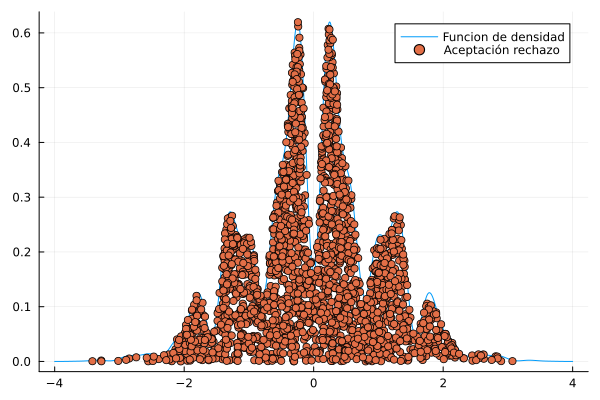

In [24]:
n = 10000 #cantidad de las simulaciones

#Definimos nuestra funcion de densidad con ese multiplo para que este bien definida nuestra proba
X = LinRange(-4,4,1000) 
G(x) = exp.((.- x .^2) ./ 2) * (0.5 .* sin(8 .* x) .^ 2 .+ 2 .* cos(2 .* x) .^ 2 .* sin(4 .* x) .^ 2 .+ 0.5 ) .* 0.319132 


#Creamos nuestras variables aleatorias
Y1 = [rand(Float64) * 8 - 4 for i in 1:n]
V1 = rand(Float64,n) * maximum(G.(X))

#Creamos una copia de nuestras variables aleatorias para ir eliminando los casos donde no aceptemos
Y2 = copy(Y1)
V2 = copy(V1)

#Evaluamos la condicion de aceptacion
for i in 1:n
    if V1[i] > G(Y1[i])
        Y2[i] = 0
        V2[i] = 0
    end
end

#Quitamos todos los 0 de nuestro resultado
filter!(!iszero,Y2)
filter!(!iszero,V2)

#Visualizamos el resultado
V3 = [rand(Float64) * G(i) for i in Y2]
plot(X,G.(X), label = "Funcion de densidad")
scatter!(Y2,V3, label = "Aceptación rechazo")

Veamos su histograma

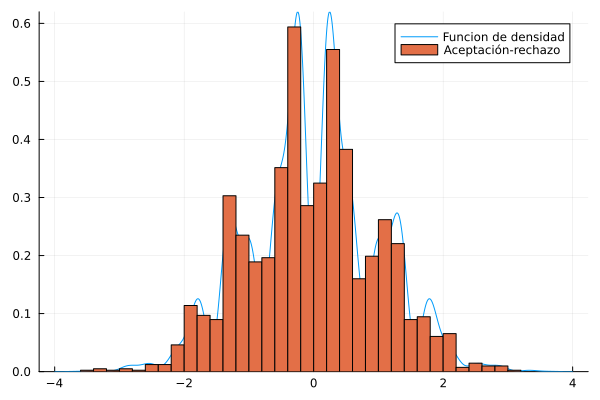

In [25]:
plot(X,G.(X), label = "Funcion de densidad")
histogram!(Y2, label = "Aceptación-rechazo", normalize=:pdf)